<a href="https://colab.research.google.com/github/mounirHai/ML-Server-Python-Samples/blob/master/Muti_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
from pip._internal import main
try:import pymc3 as pm
except:
     from pip._internal import main
     main(['install', 'pymc3'])
     import pymc3 as pm
import seaborn as sns

%matplotlib inline

In [0]:
np.random.seed(123)

# True parameter values
alpha, sigma = 1, 1
beta = 1

# Size of dataset
size = 200

# Predictor variable
X1 = np.random.randn(size)


# Simulate outcome variable
Y = alpha + beta*X1 + np.random.randn(size)*sigma

In [0]:
np.random.seed(123)

# True parameter values
alpha1, sigma1 = 1.5, 1
beta1 = 0.5

# Size of dataset
size = 100

# Predictor variable
X2 = np.random.randn(size)


# Simulate outcome variable
Y2 = alpha1 + beta1*X2 + np.random.randn(size)*sigma1


In [0]:
d = {'X': X1, 'Y': Y}
df = pd.DataFrame(data=d)
df['Code']=0

d = {'X': X2, 'Y': Y2}
df1 = pd.DataFrame(data=d)
df1['Code']=1

df_final = pd.concat([df,df1])

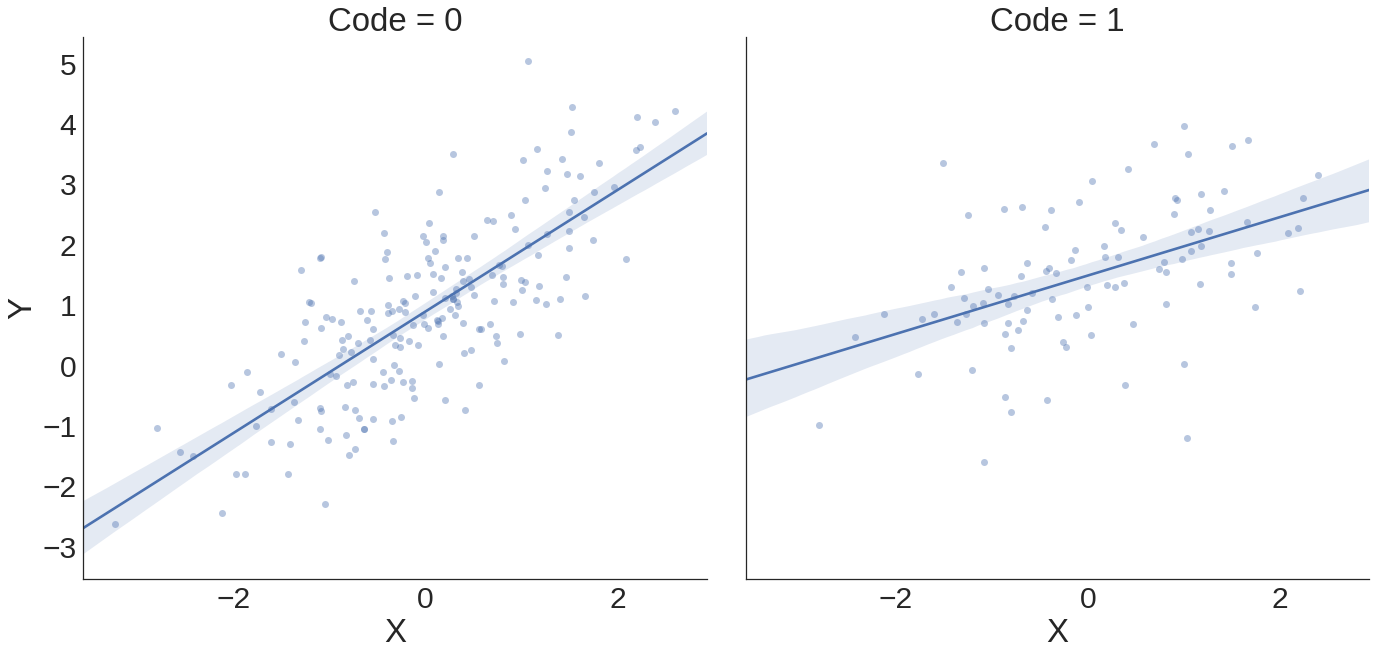

In [5]:
sns.set(style="white",font_scale=3)

g = sns.lmplot(y='Y', # Variable 1.
               x='X', # Variable 2.
               data=df_final, # Data
               size = 10,
               col='Code',               
               fit_reg=True, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4}) # Set points to semi-transparent to see overlaping points.
g.set_ylabels("Y")
g.set_xlabels("X")
#plt.title('Scatterplot: Distance vs Time')
plt.show()

In [6]:
df_final.head()

,X,Y,Code
0,-1.085631,0.617680,0
1,0.997345,1.399240,0
2,0.282978,3.483681,0
3,-1.506295,0.182002,0
4,-0.578600,0.415092,0


In [0]:
c=df_final['Code'].values # this line define the categories
YY = df_final.Y.values

Flight_Delay = pm.Model()

with Flight_Delay:    
    # Hyperpriors for group nodes
    mu_a = pm.Normal('mu_a', mu=1.0, sd=100**2)
    sigma_a = pm.HalfCauchy('sigma_a', 5)
    mu_b = pm.Normal('mu_b', mu=1.0, sd=100**2)
    sigma_b = pm.HalfCauchy('sigma_b', 5)
    
    a = pm.Normal('a', mu=mu_a, sd=sigma_a, shape=2)
    # Intercept for each county, distributed around group mean mu_a
    b = pm.Normal('b', mu=mu_b, sd=sigma_b, shape=2)
    
    eps = pm.HalfCauchy('eps', 5)

    Y_est = a[c] + b[c] * df_final.X.values
    
    # Data likelihood
    YY_est = pm.Normal('YY', mu=Y_est, sd=eps, observed=YY)


In [8]:
map_estimate = pm.find_MAP(model=Flight_Delay)

map_estimate

logp = -434.23, ||grad|| = 0.012802: 100%|██████████| 37/37 [00:00<00:00, 978.11it/s]  


{'a': array([0.90196856, 1.44753609]),
 'b': array([0.98879178, 0.51343948]),
 'eps': array(0.94122793),
 'eps_log__': array(-0.06056995),
 'mu_a': array(1.17475623),
 'mu_b': array(0.75113815),
 'sigma_a': array(0.27237541),
 'sigma_a_log__': array(-1.30057398),
 'sigma_b': array(0.23741187),
 'sigma_b_log__': array(-1.43795878)}